In [1]:
from sklearn.datasets import make_blobs #随机聚类数据
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
##聚类数据生成器，可创建100个类 1000个样本 每个样本10个特征，center表示聚类数
X,y = make_blobs(n_samples = 1000,n_features = 10,centers=10,random_state = 0)


In [6]:
#鸢尾花数据集
iris = load_iris()
#iris的4个属性，变轻是花的类别
print(iris['target'].shape)

(150,)


In [10]:
#随机森林分类器,min_split 叶子节点的类别
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier(n_estimators=10,max_depth=None,min_samples_split=3,random_state=0)
rf1.fit(iris.data[:130],iris.target[:130]) #用前130个数据作为训练集
rf2.fit(iris.data[:130],iris.target[:130]) #用前130个数据作为训练集

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
testset = iris.data[131:150]
y_true = iris.target[131:150]

In [13]:
y_true

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
y_pred1=rf1.predict(testset)
y_pred2=rf2.predict(testset)
print('rf1 prediction: ',y_pred1)
print('rf2 prediction: ',y_pred2)

rf1 prediction:  [2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
rf2 prediction:  [2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
#衡量模型 metrics: MSE越高越好！
mse1 = metrics.mean_squared_error(y_true,y_pred1)
mse2 = metrics.mean_squared_error(y_true,y_pred2)
print('MSE1: %4f' % mse1)
print('MSE2: %4f' % mse2)

MSE1: 0.105263
MSE2: 0.052632


In [17]:
#特征重要性的排序！随机森林的特性之一
feature_importance = rf2.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())
print(feature_importance)

[ 23.35633776   5.91357632  66.20339254 100.        ]


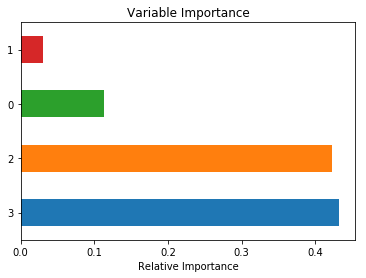

In [24]:
#绘重要性图
feat_importances = pd.Series(rf1.feature_importances_ , index = pd.DataFrame(iris.data).columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.show()